# Stable Marriage Problem

#### Gabriel Monteiro
#### Guilherme Leite
<br>

The stable marriage (SMP) or pairing problem, it consists in finding a stable pair for two equally sized groups of elements where each of them has an order of preferences for the elements of the other group. A stable match is achieved when neither of the parties have a better possible match. This problem can take many forms, such as students applying for universities, job openings and applicants, assigning users to servers in a large distributed Internet service or finding the best combinations of couples in a dating platform, which is the one we will focus on. We will consider there are only males and females on the platform and that males are only attracted to females and vice versa.

![exemplo](./preferences1.png "Exemplo de diagrama PNG")
<br>

Each person will be an object of the following class, they will have an assigned name, gender, list of preferences, relationship status, who theyre in a relationship with and to whom they have alredy proposed, the class also has methods to match and unmatch a couple and to check if thre's a possible better match.

## Classical Solution

In [2]:
class Person:

    def __init__(self, name, status, gender, preferences, engaged_to, proposed_to):
        self.name = name
        self.isFree = status
        self.gender = gender
        self.preferences = preferences
        self.engaged_to = engaged_to
        self.proposed_to = proposed_to

    def break_up(self):
        partner = self.engaged_to
        
        if not self.isFree:
            self.engaged_to = ""
            self.isFree = True
            print(self.name, "just unmatched   ", partner.name)
            
    def which_loves_more(self, person1, person2):
        for i in self.preferences:

            if i == person1.name:
                return person1
            if i == person2.name:
                return person2
                
    def engage(self, partner):
        self.engaged_to = partner
        self.isFree = False
        partner.engaged_to = self
        partner.isFree = False
        print(self.name, "just matched with", partner.name)

The male names will be set as capital letters while the females will be numbers, each person has a ranking of the elements of the other group from most prefered to least.

In [24]:
males = [Person("A",True,"male",["1", "2", "3"],"",[]),
         Person("B",True,"male",["1", "3", "2"],"",[]),
         Person("C",True,"male",["2", "1", "3"],"",[]),
        ]

females = [Person("1",True,"female",["B", "C", "A"],"",[]),
           Person("2",True,"female",["B", "A", "C"],"",[]),
           Person("3",True,"female",["C", "A", "B"],"",[]),
          ]

Now we can iterate trough the dataframes (we chose the males as reference) and check if each person is single, has a parter and if theyre a beNow we can iterate trough the dataframes (we chose the males as reference) and check if each person is single, has a partner and if they’re a better match with someone else.

In [25]:
def main(males, females):
    while (True):
        possibleCouples = len(males)
        couples = 1
        for m in males:

            if (m.isFree == False) and (len(m.proposed_to) != possibleCouples):
                couples += 1
                if couples == possibleCouples:
                    print("\nFinished!")
                    return
            else:
                couples -=1

            for x in range(0, possibleCouples):
                if m.engaged_to == "":
                    if x not in m.proposed_to:
                        m.proposed_to.append(x)

                        woman_name = m.preferences[x]
                        for w in females:
                            if woman_name == w.name:
                                woman = w

                        if woman.engaged_to != "":
                            current = woman.engaged_to
                            likes_more = woman.which_loves_more(current, m)

                            likes_more.engage(woman)

                            if likes_more != current:
                                current.break_up()
                        else:
                            m.engage(woman)
                            

<br></br>
### Testing
<br></br>
Finally let's test the program the groups used will be the males and females presented above and the best pairs should be:


- A - 2
- B - 1
- C - 3

In [26]:
main(males, females)

for m in males:
    guy = m.name
    girl = (m.engaged_to).name
    print(guy," <---> ", girl)

A just matched with 1
B just matched with 1
A just unmatched    1
C just matched with 2
A just matched with 2
C just unmatched    2
B just matched with 1
C just matched with 3

Finished!
A  <--->  2
B  <--->  1
C  <--->  3



We can now test the algorithm again with larger groups to see if the results stay true.



In [6]:
males = [Person("A",True,"male",["1", "2", "3", "4", "5", "6"],"",[]),
         Person("B",True,"male",["2", "3", "5", "1", "4", "6"],"",[]),
         Person("C",True,"male",["2", "3", "1", "5", "4", "6"],"",[]),
         Person("D",True,"male",["2", "3", "1", "5", "4", "6"],"",[]),
         Person("E",True,"male",["1", "3", "2", "5", "4", "6"],"",[]),
         Person("F",True,"male",["2", "3", "1", "5", "4", "6"],"",[]),
        ]

females = [Person("1",True,"female",["A", "B", "C", "E", "D", "F"],"",[]),
           Person("2",True,"female",["C", "A", "B", "D", "E", "F"],"",[]),
           Person("3",True,"female",["C", "A", "B", "D", "E", "F"],"",[]),
           Person("4",True,"female",["A", "B", "C", "E", "D", "F"],"",[]),
           Person("5",True,"female",["A", "B", "C", "E", "D", "F"],"",[]),
           Person("6",True,"female",["B", "A", "C", "D", "F", "E"],"",[]),
          ]

The best matches should be:
- A - 1
- B - 3
- C - 2
- D - 4
- E - 5
- F - 6

In [7]:
main(males, females)

for m in males:
    guy = m.name
    girl = (m.engaged_to).name
    print(guy," <---> ", girl)

A just matched with 1
B just matched with 2
C just matched with 2
B just unmatched    2
C just matched with 2
D just matched with 3
A just matched with 1
D just matched with 3
C just matched with 2
E just matched with 5
C just matched with 2
D just matched with 3
A just matched with 1
E just matched with 5
F just matched with 4
B just matched with 3
D just unmatched    3
A just matched with 1
E just matched with 5
D just matched with 4
F just unmatched    4
F just matched with 6

Finished!
A  <--->  1
B  <--->  3
C  <--->  2
D  <--->  4
E  <--->  5
F  <--->  6


## Hybrid Solution
Now we have a classical solution we can implement a quantum version of the algorithm. To do that we will generate all possible marriage combinations, this would be a very ineffective way of solving the problem in a classical way, however, since we can create superpositions with qubits, the complexity is wildly reduced. 
  


In [9]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()
import numpy as np

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


Since each person can only be married to one other person we can create a matrix where the columns represent the females and lines the males, when a marriage between two people happens the corresponding coordinate will be marked as '1'. Here's an example where the Male1 is married to Female2,  Male2 is married to Female1 and  Male3 to Female3:

   
<br>
    
|                 | F1 |	F2 |	F3 |
| :------------: | :------------: | :----------: | -----------: |
| M1 |	0	| 1	| 0 |
| M2 |	1	| 0	| 0 |
| M3 |    0	| 0	| 1 |
    


In [10]:
def only_1_in_row(qc,s,n,sc):
    
    for i in range(s,s+n):
        qc.cx(i,sc)
        
    qc.mct([x for x in range(s,s+n)],[sc])
    
def only_1_in_col(qc,s,n,sc):
    
    for i in range(s,s+((n-1)*n)+1,n):
        qc.cx(i,sc)
        
    qc.mct([x for x in range(s,s+((n-1)*n)+1,n)],[sc])

Using the Grover's algorithm we create all possible matrices and them impose restrictions to select only the valid marriage combinations

In [11]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "$U_s$"
    return U_s

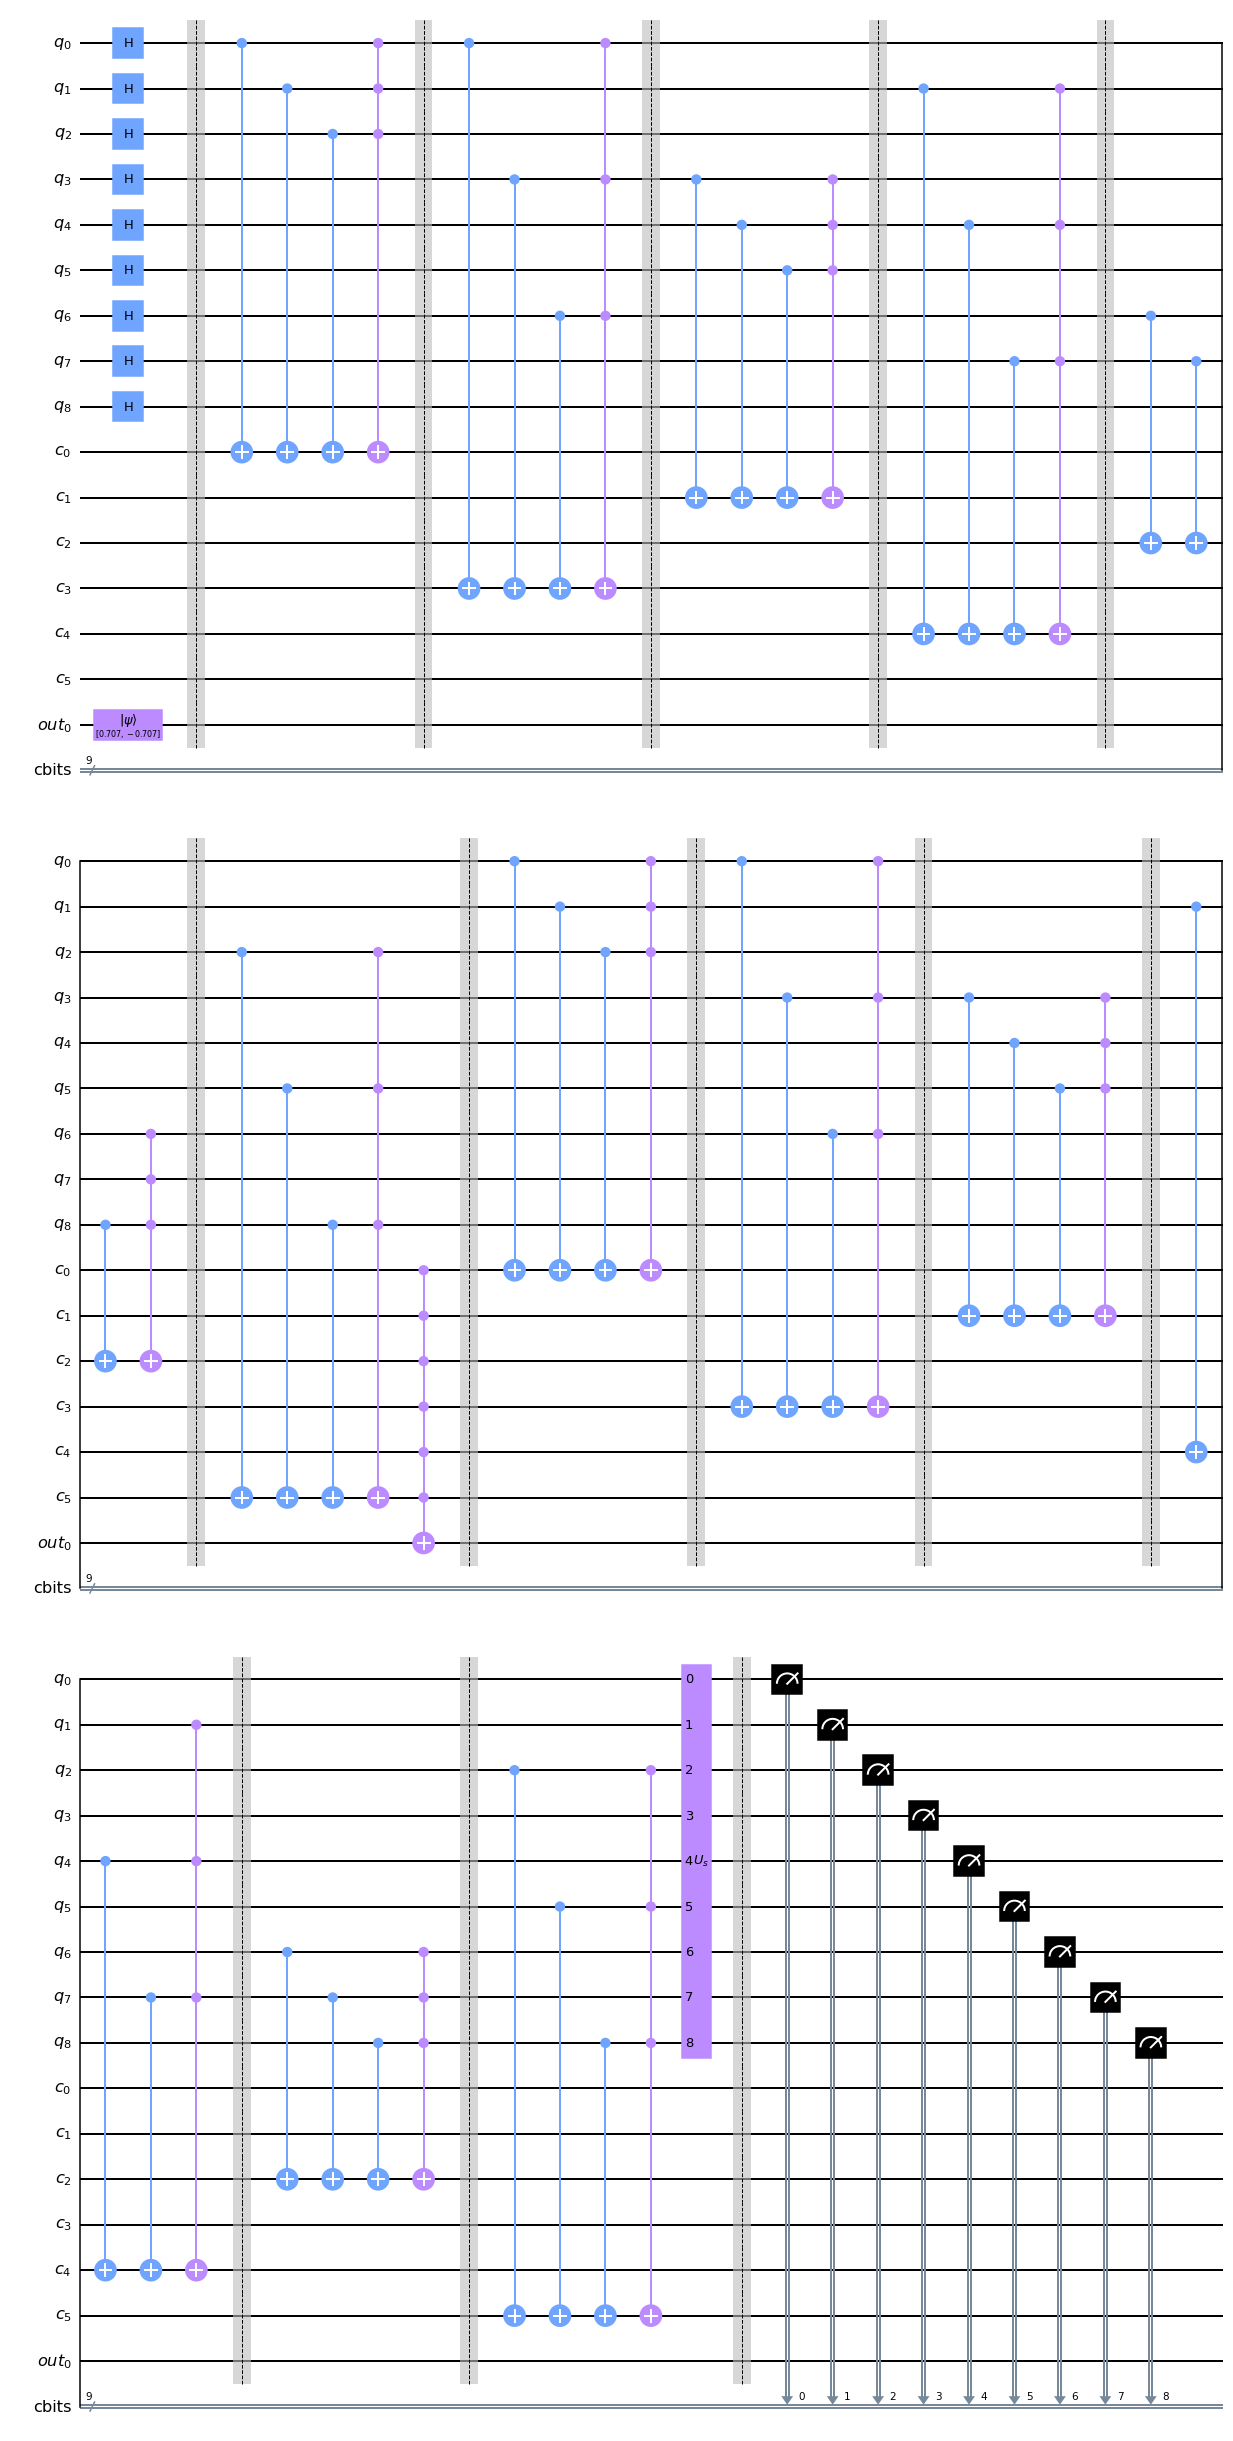

In [12]:
q = QuantumRegister(9,name='q')
cb = QuantumRegister(6, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(9, name='cbits')
qc = QuantumCircuit(q, cb, output_qubit, cbits)

qc.h([0,1,2,3,4,5,6,7,8])
qc.initialize([1, -1]/np.sqrt(2), [15])
qc.barrier()
only_1_in_row(qc,0,3,9)
qc.barrier()
only_1_in_col(qc,0,3,12)
qc.barrier()
only_1_in_row(qc,3,3,10)
qc.barrier()
only_1_in_col(qc,1,3,13)
qc.barrier()
only_1_in_row(qc,6,3,11)
qc.barrier()
only_1_in_col(qc,2,3,14)
qc.mct([9,10,11,12,13,14],[15])
qc.barrier()
only_1_in_row(qc,0,3,9)
qc.barrier()
only_1_in_col(qc,0,3,12)
qc.barrier()
only_1_in_row(qc,3,3,10)
qc.barrier()
only_1_in_col(qc,1,3,13)
qc.barrier()
only_1_in_row(qc,6,3,11)
qc.barrier()
only_1_in_col(qc,2,3,14)
qc.append(diffuser(9), [0,1,2,3,4,5,6,7,8])
qc.barrier()
qc.measure(q, cbits)
qc.draw()

After creating the circuit we can simulate it using the qasm simulator and get the most recurring combinations

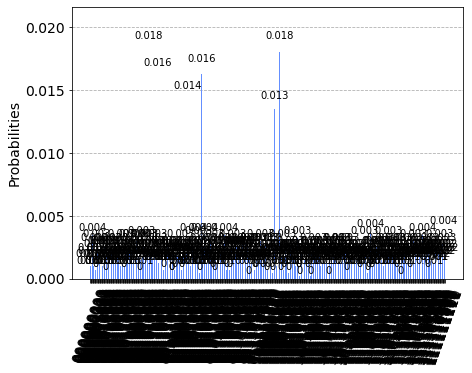

In [16]:
# Simulate and plot results
qasm_simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=qasm_simulator, shots=4000).result()
plot_histogram(result.get_counts())

In [18]:
res = result.get_counts()
results = sorted(res, key=res.get, reverse=True)[:6]
print(results)

['100010001', '001010100', '010100001', '001100010', '010001100', '100001010']


Now that we have all possible valid combinations we can implement a classical algorithm to find which matrix is stable. For that we will slightly alter the preferences.

In [22]:
males = {1: [1, 2, 3],
         2: [1, 3, 2],
         3: [2, 1, 3],
        }

females = {1: [2, 3, 1],
           2: [2, 1, 3],
           3: [3, 1, 2],
           }

n = 3

Finally we check for stable marriages, when we find a matrix where all the marriges are stable we stop the algorithm.

In [23]:
def check_couples(n,results,males,females):
    isStable = False
    
    for comb in results:
        men = {}
        women = {}
        couples = []
        
        for i in range(len(comb)):
            if comb[i] == '1':
                men[(i//n +1)] = i%n +1
                women[(i%n +1)] = i//n +1
                print((i//n +1),(i%n +1))
                couples.append(((i//n +1),(i%n +1)))

        if check_stability(n,men,women,males,females):
            return couples

def check_stability(n,men, women, males, females):
    Stable = True
    
    for m in men:
        if not Stable: break
            
        rank_man = males[m].index(men[m])
        others = [f for f in range(1,n+1) if (f != men[m]) and males[m].index(f) < rank_man]
        
        for f in others:
            rank_woman = females[f].index(women[f])
            if rank_woman > females[f].index(m):
                Stable = False
                break

    return Stable

print(check_couples(n,results,males,females))

1 1
2 2
3 3
1 3
2 2
3 1
1 2
2 1
3 3
[(1, 2), (2, 1), (3, 3)]


As we can see combination output is the same as the classical solution.

## Conclusion

The Quantum solution can be used to reduce the overall complexity of the solution, if we wanted to find all the valid combinations in a classical algorithm, the complexity would be 0(2^(n^2)) while the quantum version has a complexity of O(n^2) where n is the number of people in each gender role. This happens because when using qubits whe can generate interpolations that make the complexity go from exponential to quadratic. When using the Gale-Shapley algorithm the classical implementation has a complexity of O(n^2) wich is the same as the quantum meaning we couldn't make it better than this approach but it is a lot more efficient than the 'brute-force' approach . The quantum algorithm is scalable only in theory since the are limitations on the number of qubits that can be simulated, which restricts the example to 3 people for each gender, if this limit was expanded we could also increase the number of people using the same logic, there are quantum computers that have a larger numeber of qubits however they would still impose the same limitations only to a higher number of people.  
